In [161]:
include("../src/HPFEM.jl");

In [162]:
using Jacobi
using PyPlot

In [163]:
M=20
Q=M
#
b1 = HPFEM.Basis1d(M,Q);
#
lagr = HPFEM.Lagrange1d(M);
quad = HPFEM.QuadType(Q);
b2 = HPFEM.Basis1d(lagr, quad);
#;
b3 = HPFEM.SEM1d(M);
#
leg = HPFEM.Legendre1d(M);
b4 = HPFEM.Basis1d(leg, quad);

LoadError: LoadError: Base.LinAlg.PosDefException(21)
while loading In[163], in expression starting on line 13

In [164]:
el1 = HPFEM.Element1d(1, -1.0, 1.0, b1);
el2 = HPFEM.Element1d(1, -1.0, 1.0, b2);
el3 = HPFEM.Element1d(1, -1.0, 1.0, b3);
el4 = HPFEM.Element1d(1, -1.0, 1.0, b4);


LoadError: LoadError: MethodError: `convert` has no method matching convert(::Type{HPFEM.Element1d{T<:Number}}, ::Int64, ::Float64, ::Float64, ::HPFEM.Basis1d{Float64,HPFEM.Legendre1d})
This may have arisen from a call to the constructor HPFEM.Element1d{T<:Number}(...),
since type constructors fall back to convert methods.
Closest candidates are:
  HPFEM.Element1d{T<:Number}(::Int64, ::T<:Number, ::T<:Number, !Matched::Array{T<:Number,1}, !Matched::Array{T<:Number,1}, !Matched::Array{T<:Number,2}, !Matched::Array{T<:Number,1}, !Matched::Array{T<:Number,1}, !Matched::Array{T<:Number,1}, !Matched::Array{T<:Number,1})
  HPFEM.Element1d{T<:Number}(::Any, ::T<:Number, ::T<:Number, !Matched::HPFEM.GenBasis1d)
  call{T}(::Type{T}, ::Any)
  ...
while loading In[164], in expression starting on line 4

In [165]:
M1 = HPFEM.mass_matrix(b1, el1);
M2 = HPFEM.mass_matrix(b2, el2);
M3 = zeros(M,M);
HPFEM.add_mass_matrix!(b3, el3, M3);
M4 = HPFEM.mass_matrix(b4, el4);



LoadError: LoadError: MethodError: `mass_matrix` has no method matching mass_matrix(::HPFEM.Basis1d{Float64,HPFEM.Legendre1d}, ::HPFEM.Element1d{Float64})
while loading In[165], in expression starting on line 5

In [166]:
round(M1,5);

In [167]:
M2

20x20 Array{Float64,2}:
 0.00526316  0.0        0.0        …  0.0        0.0        0.0       
 0.0         0.0322371  0.0           0.0        0.0        0.0       
 0.0         0.0        0.0571818     0.0        0.0        0.0       
 0.0         0.0        0.0           0.0        0.0        0.0       
 0.0         0.0        0.0           0.0        0.0        0.0       
 0.0         0.0        0.0        …  0.0        0.0        0.0       
 0.0         0.0        0.0           0.0        0.0        0.0       
 0.0         0.0        0.0           0.0        0.0        0.0       
 0.0         0.0        0.0           0.0        0.0        0.0       
 0.0         0.0        0.0           0.0        0.0        0.0       
 0.0         0.0        0.0        …  0.0        0.0        0.0       
 0.0         0.0        0.0           0.0        0.0        0.0       
 0.0         0.0        0.0           0.0        0.0        0.0       
 0.0         0.0        0.0           0.0        0.0 

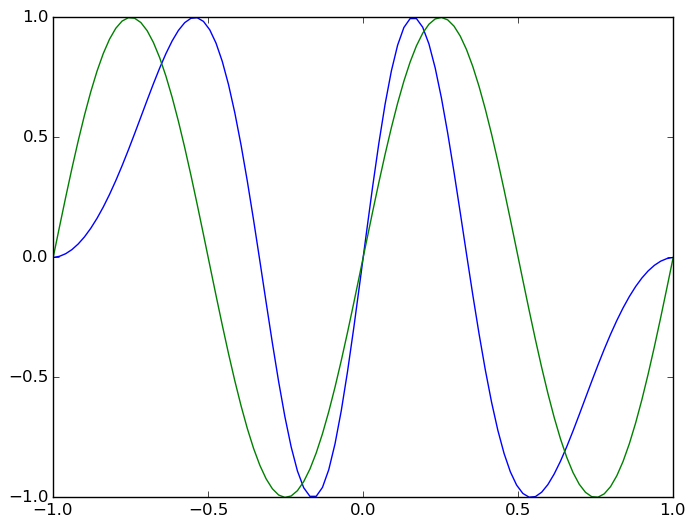

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f6a16d25590>

In [191]:

Fe = zeros(Q)

fe = fun(el2.ξ)
HPFEM.add_rhs!(b2, el2, fe, Fe)
Fe[1] = 0
Fe[Q] = 0
u = M2\Fe
#plot(u)
Q2 = 100
x =linspace(-1,1,Q2)
lagr5 = HPFEM.Lagrange1d(M);
quad5 = HPFEM.QuadType(Q2);
b5 = HPFEM.Basis1d(lagr5, quad5);
plot(x,b5.ϕ*u)
plot(x,fun(x))

In [169]:
sum(M2,2)

20x1 Array{Float64,2}:
 0.00526316
 0.0322371 
 0.0571818 
 0.0806318 
 0.101991  
 0.120709  
 0.1363    
 0.148362  
 0.15658   
 0.160743  
 0.160743  
 0.15658   
 0.148362  
 0.1363    
 0.120709  
 0.101991  
 0.0806318 
 0.0571818 
 0.0322371 
 0.00526316

In [170]:
round(M4,5)

6x6 Array{Float64,2}:
  2.0   0.0       0.0   0.0      -0.0  -0.0    
  0.0   0.66667   0.0  -0.0      -0.0  -0.0    
  0.0   0.0       0.4  -0.0      -0.0  -0.0    
  0.0  -0.0      -0.0   0.28571  -0.0   0.28571
 -0.0  -0.0      -0.0  -0.0       0.5   0.0    
 -0.0  -0.0      -0.0   0.28571   0.0   0.28571

In [171]:
sum(M1,2)

20x1 Array{Float64,2}:
 1.1        
 1.23333    
 0.385714   
 0.0253968  
 0.0034632  
 0.0010656  
 0.000444   
 0.000219388
 0.000121241
 7.25796e-5 
 4.61512e-5 
 3.07675e-5 
 2.13093e-5 
 1.52305e-5 
 1.11772e-5 
 8.38942e-6 
 6.42047e-6 
 4.99756e-6 
 0.00320165 
 0.00623952 

In [172]:
using Jacobi
using PyPlot

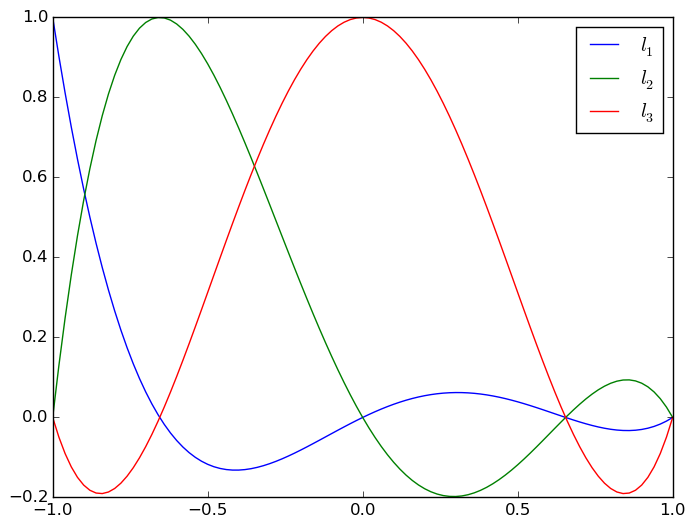

In [173]:
z = zglj(5)
x = linspace(-1,1,101)
for i in 1:3
    plot(x,lagrange(i,x,z),label="\$ l_$i \$")
    legend()
end

In [174]:
quad = HPFEM.QuadType(5)
quad.w

5-element Array{Float64,1}:
 0.1     
 0.544444
 0.711111
 0.544444
 0.1     

In [175]:
z = zglj(5)
w = wglj(z)
quad.Q

5

In [176]:
methods(HPFEM.lagrange1d)

LoadError: LoadError: UndefVarError: lagrange1d not defined
while loading In[176], in expression starting on line 1

In [178]:
b3.w

20-element Array{Float64,1}:
 0.00526316
 0.0322371 
 0.0571818 
 0.0806318 
 0.101991  
 0.120709  
 0.1363    
 0.148362  
 0.15658   
 0.160743  
 0.160743  
 0.15658   
 0.148362  
 0.1363    
 0.120709  
 0.101991  
 0.0806318 
 0.0571818 
 0.0322371 
 0.00526316